In [1]:
"""
I had the privilege of serving as a mentor at Campuskey Potchefstroom in 2022 and 2023, where I was part of the "Check-in Smurfs" 
team. As a member of the team working at the Welcome Station, it was my responsibility to ensure that all requirements were met 
before tenants could move into their rooms. In this role, I witnessed firsthand the significant impact that late cancellations 
have on unoccupied rooms and the subsequent challenges faced in finding new tenants. 

In order to address this problem, this project takes a data-driven approach, making use of predictive modeling
tools and data analysis techniques. We seek to understand the proportion of tenants that break their leases late using
the Campuskey Girls Dataset, Molen Dataset, Innilaan Dataset, and the Cancellation Dataset.
Our goal is to identify key patterns, trends, and underlying factors contributing to these late cancellations.

To achieve this, we will analyze distribution of room types, nationalities, and other relevant factors among the tenants 
residing in the 3 Campuskey buildings. By exploring the relationships between these variables and the occurrence of late 
cancellations, we seek to identify significant associations that can inform the development of effective strategies and solutions
to minimize unoccupied rooms and improve tenant retention.

Originally, this project was intended to conclude with the development of a predictive model. However, due to insufficient
reasons and data to establish a robust statistical probability, I have decided to postpone this aspect of the project until I 
receive additional information, particularly regarding financial defaults, which could enhance the accuracy and reliability of
the predictive model. Once this data is available, I can proceed with implementing the predictive modeling approach to better 
address the issue of late cancellations and improve the tenant retention strategy.

The ultimate objective of this project is to reduce the number of vacant rooms, mitigate financial losses, and elevate the 
overall tenant experience through data-driven decision-making and predictive modeling.

Through this endeavor, I aspire to showcase my expertise as a data scientist, utilizing advanced analytical methodologies to 
extract valuable insights and provide actionable recommendations.
"""

'\nI had the privilege of serving as a mentor at Campuskey Potchefstroom in 2022 and 2023, where I was part of the "Check-in Smurfs" \nteam. As a member of the team working at the Welcome Station, it was my responsibility to ensure that all requirements were met \nbefore tenants could move into their rooms. In this role, I witnessed firsthand the significant impact that late cancellations \nhave on unoccupied rooms and the subsequent challenges faced in finding new tenants. \n\nIn order to address this problem, this project takes a data-driven approach, making use of predictive modeling\ntools and data analysis techniques. We seek to understand the proportion of tenants that break their leases late using\nthe Campuskey Girls Dataset, Molen Dataset, Innilaan Dataset, and the Cancellation Dataset.\nOur goal is to identify key patterns, trends, and underlying factors contributing to these late cancellations.\n\nTo achieve this, we will analyze distribution of room types, nationalities, an

In [4]:
# Importing the necessary libraries 
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization

from ipywidgets import interact  # For interactivity

import scipy.stats as stats  # For statistical analysis
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.metrics import mean_squared_error  # For evaluating the model's performance

In [84]:
# Read the CK Innilaan dataset from the specified file path
innilaan = pd.read_csv("C:/Users/Olidia/Desktop/Projects/CK/Innilaan.csv")

#information about dataset
innilaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1010 non-null   object
 1   Nationality            2582 non-null   object
 2   Room Type Assigned To  2582 non-null   object
 3   Year                   2582 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 80.8+ KB


In [85]:
print(innilaan.columns)

Index(['Gender', 'Nationality', 'Room Type Assigned To', 'Year'], dtype='object')


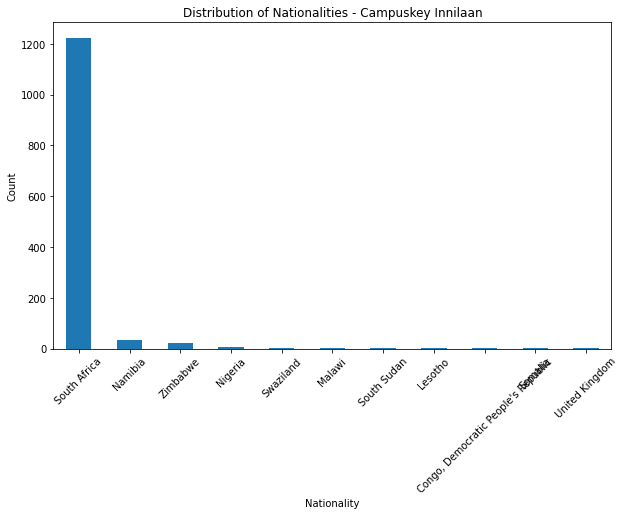

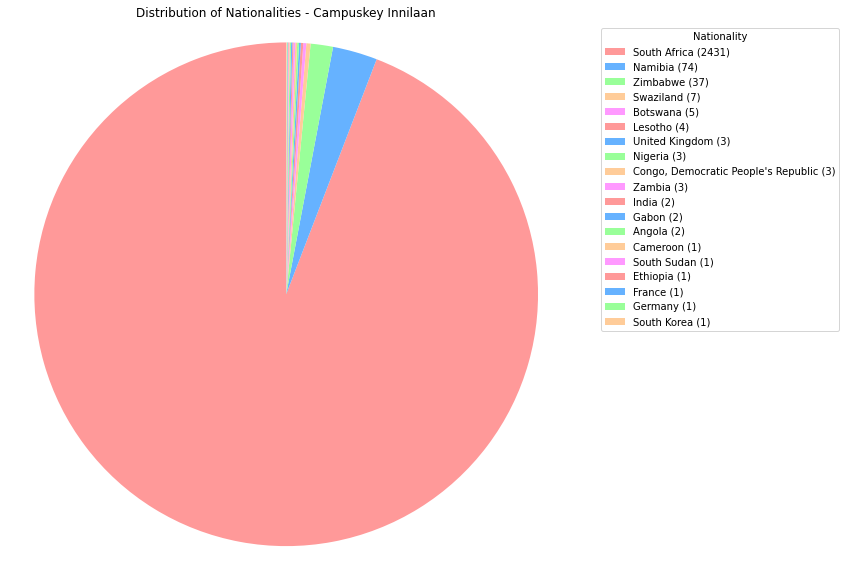

In [86]:
# Calculate the count of tenants for each nationality
nationality_inn = innilaan['Nationality'].value_counts()

# Bar chart and pie chart to examine the distribution of nationalities among tenants at Innilaan
plt.figure(figsize=(10, 6))
nationality.plot(kind='bar')
plt.title('Distribution of Nationalities - Campuskey Innilaan')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a color palette for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99FF']

# Pie chart
plt.figure(figsize = (10, 10))
patches, _ = plt.pie(nationality_inn, colors = colors, startangle = 90)
plt.title('Distribution of Nationalities - Campuskey Innilaan')
plt.axis('equal')

# Create a legend with country labels and percentages
legend_labels = [f'{label} ({count})' for label, count in zip(nationality_inn.index, nationality_inn)]
plt.legend(patches, legend_labels, title = 'Nationality', loc = 'upper right', bbox_to_anchor = (1, 0, 0.5, 1))

plt.show()

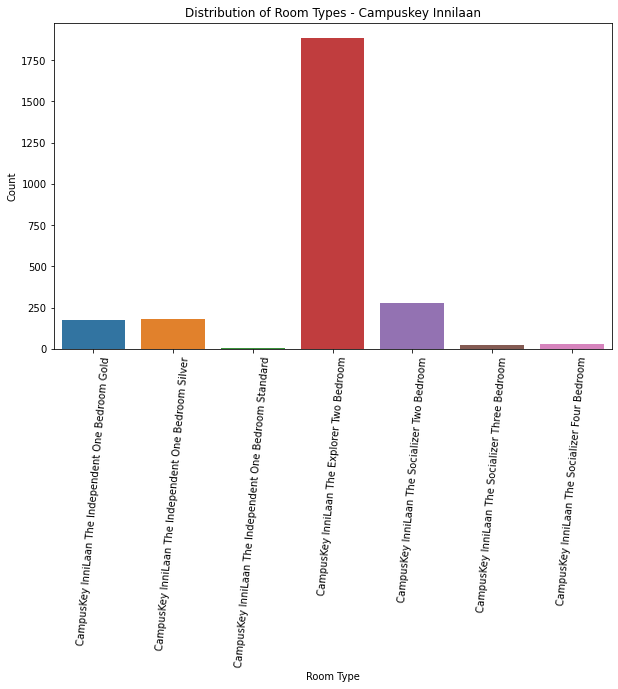

In [93]:
# Distribution of rooms at CK Innilaan

room_types_inn = [
    "CampusKey InniLaan The Independent One Bedroom Gold",
    "CampusKey InniLaan The Independent One Bedroom Silver",
    "CampusKey InniLaan The Independent One Bedroom Standard",
    "CampusKey InniLaan The Explorer Two Bedroom",
    "CampusKey InniLaan The Socializer Two Bedroom",
    "CampusKey InniLaan The Socializer Three Bedroom",
    "CampusKey InniLaan The Socializer Four Bedroom"   
]

# Calculate the count of each room type
room_type_counts_inn = innilaan['Room Type Assigned To'].value_counts().reindex(room_types_inn)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts_inn.index, y=room_type_counts_inn.values)
plt.title('Distribution of Room Types - Campuskey Innilaan')
plt.xlabel('Room Type')
plt.ylabel('Count')

plt.xticks(rotation = 85)

plt.show()

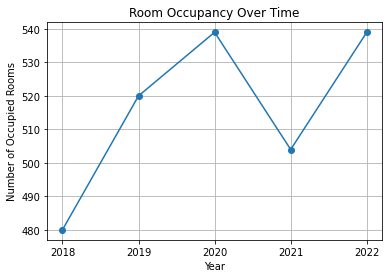

In [106]:
# Trend of room occupancy over time

# Convert the 'Year' column to integer type
innilaan['Year'] = innilaan['Year'].astype(int)

# Group the data by year and count the number of occupied rooms
occupancy_by_year_inn = innilaan.groupby('Year').size()

# Line chart to visualize room occupancy over time
plt.plot(occupancy_by_year_inn.index, occupancy_by_year_inn.values, marker='o')
plt.xticks(occupancy_by_year_inn.index)  # Set the x-ticks to match the years
plt.xlabel('Year')
plt.ylabel('Number of Occupied Rooms')
plt.title('Room Occupancy Over Time')
plt.grid(True)
plt.show()

In [78]:
# Read the CK Girls dataset from the specified file path
girls = pd.read_csv("C:/Users/Olidia/Desktop/Projects/CK/Girls.csv")

#information about dataset
girls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Applicant Name         1297 non-null   object
 1   Nationality            1297 non-null   object
 2   Room Type Assigned To  1297 non-null   object
 3   DateOfCheckIn          492 non-null    object
 4   Year                   1297 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 50.8+ KB


In [79]:
print(girls.columns)

Index(['Applicant Name', 'Nationality', 'Room Type Assigned To',
       'DateOfCheckIn', 'Year'],
      dtype='object')


In [80]:
girls.drop(['Applicant Name', "DateOfCheckIn"], axis = 1, inplace = True)
print(girls.columns)

Index(['Nationality', 'Room Type Assigned To', 'Year'], dtype='object')


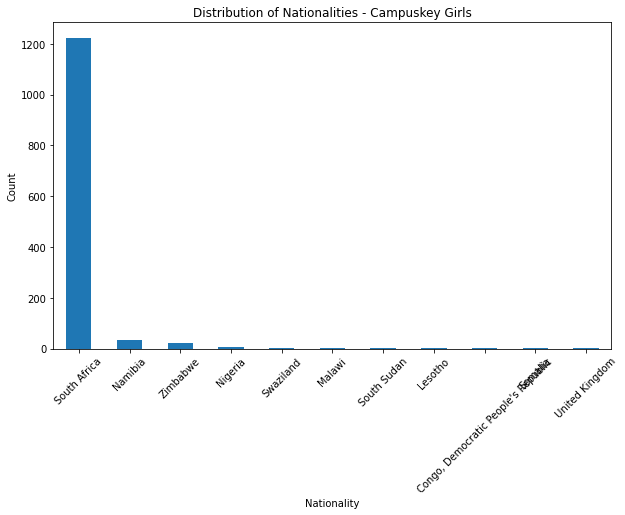

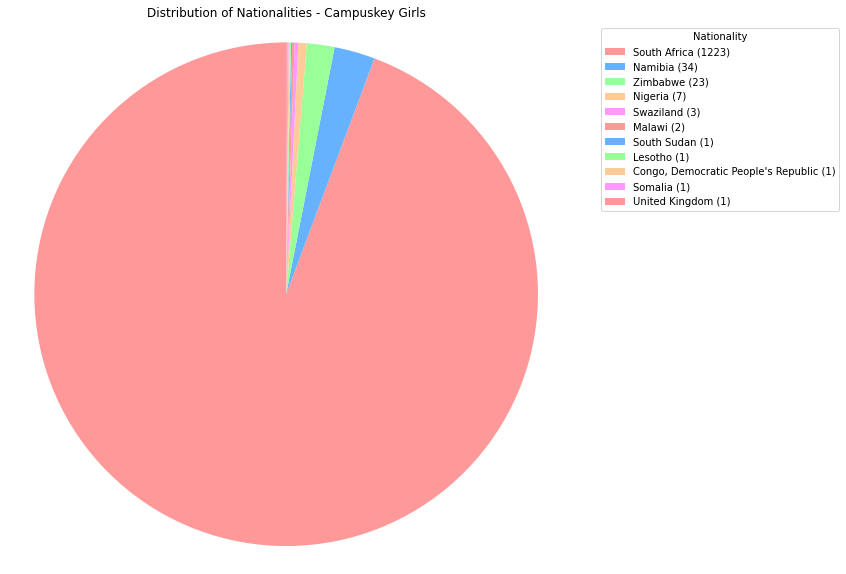

In [81]:
# Calculate the count of tenants for each nationality
nationality_girls = girls['Nationality'].value_counts()

# Bar chart and pie chart to examine the distribution of nationalities among tenants at Girls
plt.figure(figsize=(10, 6))
nationality.plot(kind='bar')
plt.title('Distribution of Nationalities - Campuskey Girls')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a color palette for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99FF']

# Pie chart
plt.figure(figsize = (10, 10))
patches, _ = plt.pie(nationality_girls, colors = colors, startangle = 90)
plt.title('Distribution of Nationalities - Campuskey Girls')
plt.axis('equal')

# Create a legend with country labels and percentages
legend_labels = [f'{label} ({count})' for label, count in zip(nationality_girls.index, nationality_girls)]
plt.legend(patches, legend_labels, title = 'Nationality', loc = 'upper right', bbox_to_anchor = (1, 0, 0.5, 1))

plt.show()

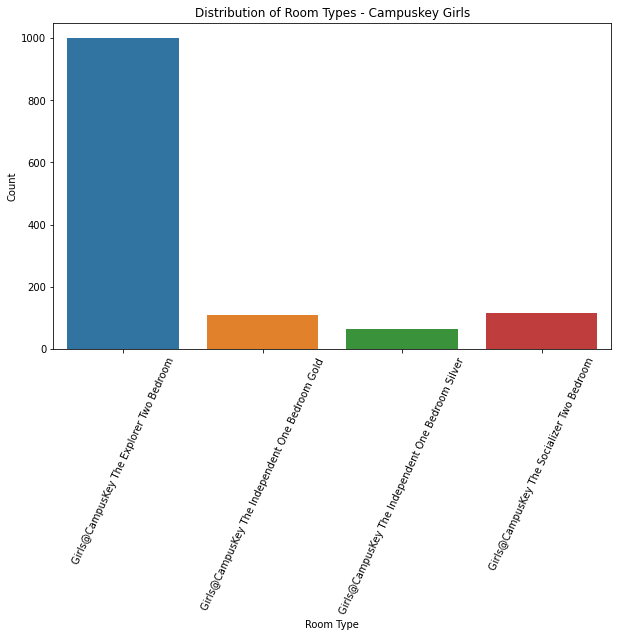

In [82]:
# Distribution of rooms at CK Girls

room_types = [
    "Girls@CampusKey The Explorer Two Bedroom",
    "Girls@CampusKey The Independent One Bedroom Gold",
    "Girls@CampusKey The Independent One Bedroom Silver",
    "Girls@CampusKey The Socializer Two Bedroom"
]

# Calculate the count of each room type
room_type_counts = girls['Room Type Assigned To'].value_counts().reindex(room_types)

# Visualize with a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Distribution of Room Types - Campuskey Girls')
plt.xlabel('Room Type')
plt.ylabel('Count')

plt.xticks(rotation = 65)

plt.show()

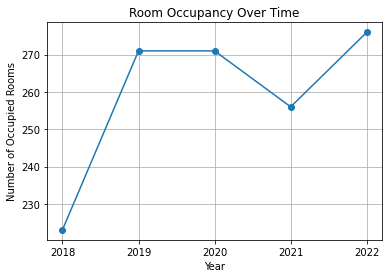

In [83]:
# Trend of room occupancy over time

# Convert the 'Year' column to integer type
girls['Year'] = girls['Year'].astype(int)

# Group the data by year and count the number of occupied rooms
occupancy_by_year = girls.groupby('Year').size()

# Line chart to visualize room occupancy over time
plt.plot(occupancy_by_year.index, occupancy_by_year.values, marker='o')
plt.xticks(occupancy_by_year.index)  # Set the x-ticks to match the years
plt.xlabel('Year')
plt.ylabel('Number of Occupied Rooms')
plt.title('Room Occupancy Over Time')
plt.grid(True)
plt.show()

In [102]:
# Read the CK Girls dataset from the specified file path
molen = pd.read_csv("C:/Users/Olidia/Desktop/Projects/CK/Molen.csv")

#information about dataset
molen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Applicant Name         842 non-null    object
 1   Nationality            842 non-null    object
 2   Room Type Assigned To  842 non-null    object
 3   Year                   843 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 26.5+ KB


In [104]:
molen.drop(['Applicant Name'], axis=1, inplace = True)
print(molen.columns)

Index(['Nationality', 'Room Type Assigned To', 'Year'], dtype='object')


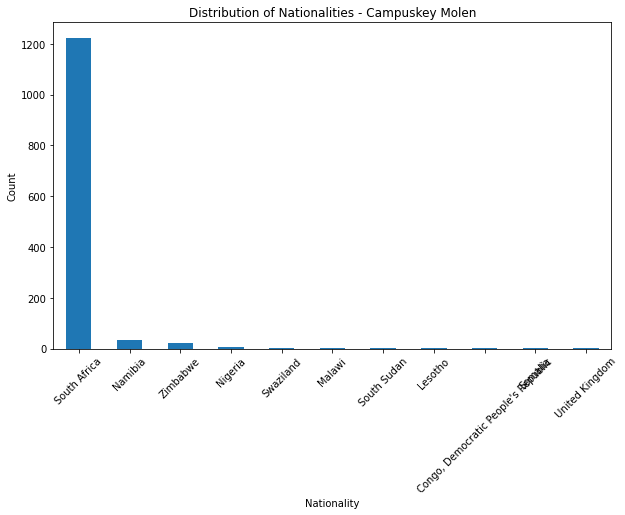

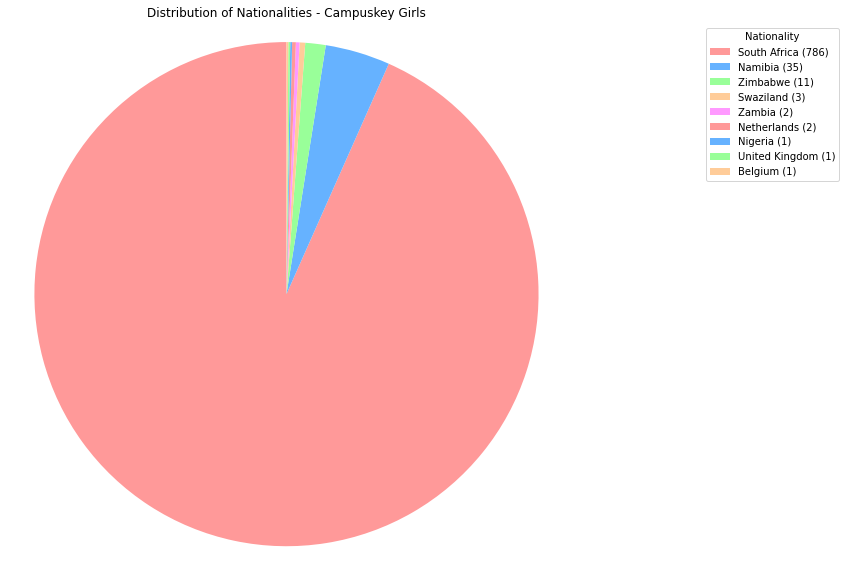

In [105]:
# Calculate the count of tenants for each nationality
nationality_molen = molen['Nationality'].value_counts()

# Bar chart and pie chart to examine the distribution of nationalities among tenants at Molen
plt.figure(figsize=(10, 6))
nationality.plot(kind='bar')
plt.title('Distribution of Nationalities - Campuskey Molen')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a color palette for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99FF']

# Pie chart
plt.figure(figsize = (10, 10))
patches, _ = plt.pie(nationality_molen, colors = colors, startangle = 90)
plt.title('Distribution of Nationalities - Campuskey Girls')
plt.axis('equal')

# Create a legend with country labels and percentages
legend_labels = [f'{label} ({count})' for label, count in zip(nationality_molen.index, nationality_molen)]
plt.legend(patches, legend_labels, title = 'Nationality', loc = 'upper right', bbox_to_anchor = (1, 0, 0.5, 1))

plt.show()

In [ ]:
#All rooms at CK Molen are Socialiser 5 bedrooms

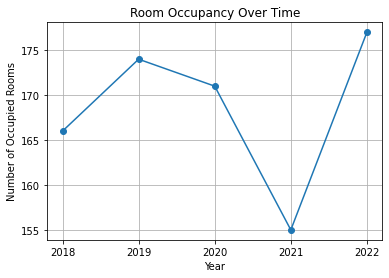

In [107]:
# Trend of room occupancy over time

# Convert the 'Year' column to integer type
molen['Year'] = molen['Year'].astype(int)

# Group the data by year and count the number of occupied rooms
occupancy_by_year_molen = molen.groupby('Year').size()

# Line chart to visualize room occupancy over time
plt.plot(occupancy_by_year_molen.index, occupancy_by_year_molen.values, marker='o')
plt.xticks(occupancy_by_year_molen.index)  # Set the x-ticks to match the years
plt.xlabel('Year')
plt.ylabel('Number of Occupied Rooms')
plt.title('Room Occupancy Over Time')
plt.grid(True)
plt.show()

In [ ]:
"""
The most popular room types in Innilaan, Girls, and Molen are the Explorer Bedrooms.
South Africans represent the largest number of tenants in each building, with Innilaan having the highest overall number of
tenants. 
Across all CampusKey buildings, there was a significant decrease in the number of occupied rooms in 2021.
The data presented in this analysis covers tenant occupation up to 2022 and does not directly reflect the impact of the COVID-19
pandemic. It is important to consider that the pandemic may have had significant effects on tenant occupation patterns globally 
in student accommodations. Further analysis and data beyond 2023 would be necessary to assess the influence of the COVID-19
pandemic.
"""

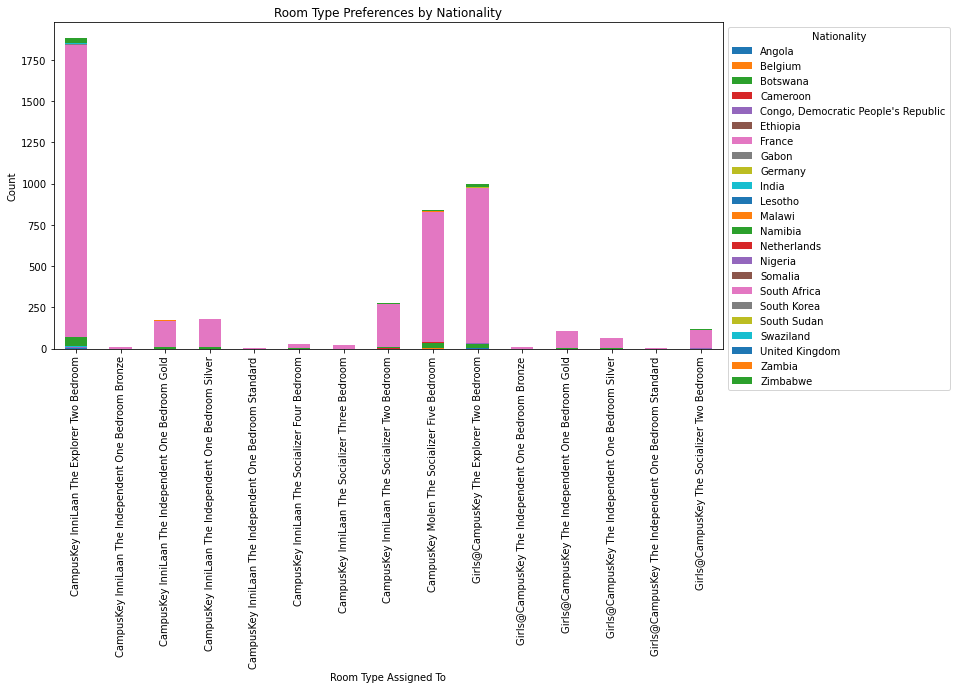

In [147]:
# Group data by room type and nationality, and calculate the counts
grouped_data = combined_data.groupby(['Room Type Assigned To', 'Nationality']).size().unstack()

# Plot a grouped bar chart without labeled bars
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Room Type Preferences by Nationality')
plt.xlabel('Room Type Assigned To')
plt.ylabel('Count')
plt.xticks(rotation = 90)

# Remove labels for each bar
plt.legend(title='Nationality', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [5]:
# Read the Cancellation dataset from the specified file path
cancel = pd.read_csv("C:/Users/Olidia/Desktop/Projects/CK/Cancellations.csv")

#information about dataset
cancel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Building                 192 non-null    object 
 1   Cancellation Month       192 non-null    object 
 2   Cancellation Year        192 non-null    int64  
 3   Gender                   192 non-null    object 
 4   Reason for Cancellation  192 non-null    object 
 5   Unnamed: 5               0 non-null      float64
 6   Unnamed: 6               0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 10.6+ KB


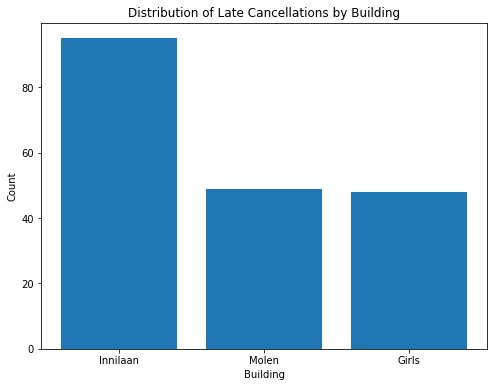

In [110]:
# Distribution of late cancellations by building (Innilaan, Girls, Molen)

# Count the number of cancellations for each building
building_counts = cancel['Building'].value_counts()

# Create a bar chart to visualize the distribution of cancellations by building
plt.figure(figsize=(8, 6))
plt.bar(building_counts.index, building_counts.values)
plt.title('Distribution of Late Cancellations by Building')
plt.xlabel('Building')
plt.ylabel('Count')
plt.show()


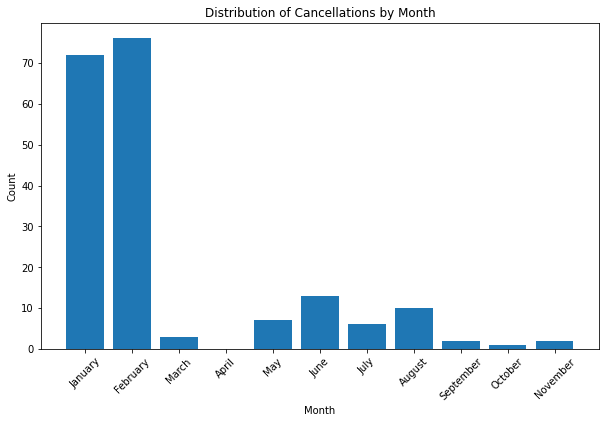

In [111]:
# Distribution of cancellation months

# Count the number of cancellations for each month
month_counts = cancel['Cancellation Month'].value_counts()

# Sort the months in chronological order
sorted_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_counts = month_counts.reindex(sorted_months)

# Create a bar chart to visualize the distribution of cancellations by month
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values)
plt.title('Distribution of Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

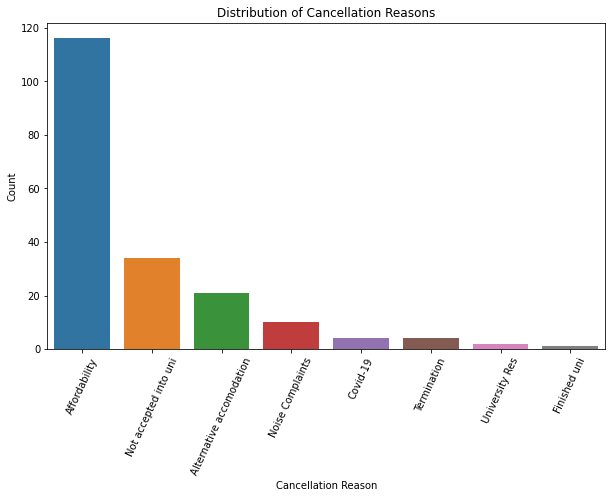

In [119]:
# Calculate the count of each cancellation reason
cancellation_reasons = cancel['Reason for Cancellation'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart or countplot
sns.countplot(x='Reason for Cancellation', data=cancel, order=cancellation_reasons.index)

# Set the x-axis labels to rotate for better readability
plt.xticks(rotation = 65)

# Set the axis labels and title
plt.xlabel('Cancellation Reason')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Reasons')

# Show the plot
plt.show()

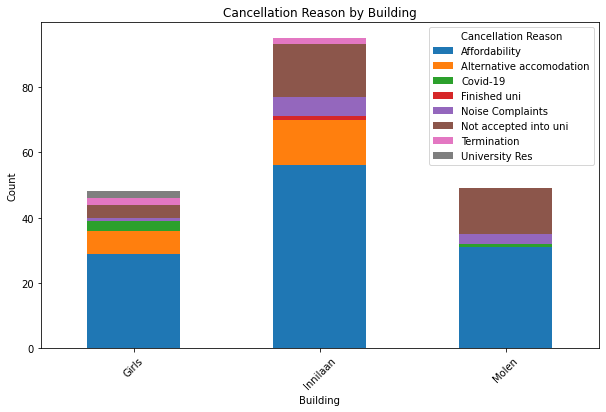

In [126]:
# Analyze room type and reasons for cancellation
room_cancellation_counts = cancel.groupby(['Building', 'Reason for Cancellation']).size().unstack()

# Plot a stacked bar chart
room_cancellation_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cancellation Reason by Building')
plt.xlabel('Building')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cancellation Reason')
plt.show()

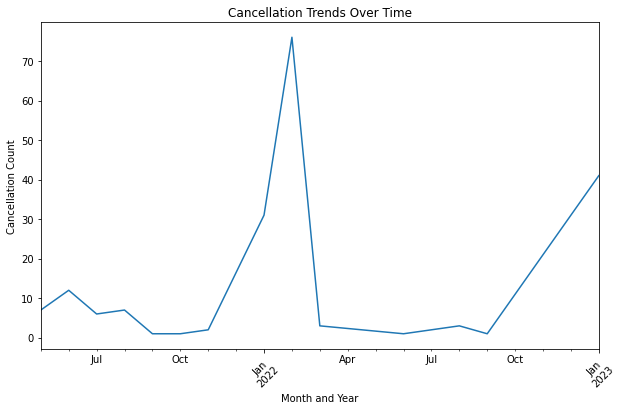

In [128]:
# Convert cancellation month and year to datetime format
cancel['Cancellation Date'] = pd.to_datetime(cancel['Cancellation Month'] + ' ' + cancel['Cancellation Year'].astype(str))

# Group cancellations by month and year
cancel_trends = cancel.groupby(cancel['Cancellation Date'].dt.to_period('M')).size()

# Line chart to visualize cancellation trends over time
plt.figure(figsize=(10, 6))
cancel_trends.plot(kind='line')
plt.title('Cancellation Trends Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Cancellation Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
"""
The highest number of cancellations was observed among tenants staying in Innilaan, with the majority of cancellations 
occurring in February. The primary reason for these cancellations appears to be affordability, particularly in Innilaan. 
The second most common reason for cancellations was not being accepted into university. Cancellations seem to gradually decrease
until November 2021, where they begin to rise and reach their peak in January 2022, and then decrease again before rising
continuously from August 2022.
"""

In [6]:
# Saving dataset to a parquet format to use with R 
cancel.to_parquet('C:/Users/Olidia/Desktop/Projects/CK/cancel_dataset.parquet')

In [5]:
install.packages("arrow")

Warning message:
"package 'arrow' is in use and will not be installed"


In [3]:
# Load the required package
library(arrow)

# Read the Parquet file
data <- arrow::read_parquet("C:/Users/Olidia/Desktop/Projects/CK/cancel_dataset.parquet")

# View the data
head(data)

ERROR: Error in library(randomForest): there is no package called 'randomForest'


In [2]:
# Testing the hypothesis that the late cancellation rate differs between different buildings (Innilaan, Girls, Molen) using
# chi-square test of independence. 

# Create a contingency table of Building and Reason for Cancellation
contingency_table <- table(data$Building, data$'Reason for Cancellation')

# Perform chi-square test of independence
chisq_result <- chisq.test(contingency_table)

# Print the chi-square test result
print(chisq_result)

Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 29.208, df = 14, p-value = 0.009793



In [ ]:
# H0: There is no association between the building and reason for cancellation variables
# H0: There is a significant association between the building and reason for cancellation variables.

# The results of the chi-square test indicate that there is a significant association between the "Building" and "Reason for
# Cancellation" variables (X-squared = 29.208, df = 14, p-value = 0.009793).
# This suggests that the late cancellation rate differs significantly across the different buildings (Innilaan, Girls, Molen). 

# Therefore, based on the test results, we can reject the null hypothesis and conclude that there is a significant difference
# in the late cancellation rate between the buildings.

In [2]:
"""
Findings:
The significant association between building and reason for cancellation indicates that late cancellations vary across 
different buildings. This suggests that each building may have unique characteristics or challenges that contribute to late
cancellations. 

Since Innilaan experienced the highest number of cancellations, it should be a priority focus for implementing measures to 
reduce late cancellations. The most common reason for cancellations being affordability suggests that offering more flexible
payment options or financial support especially to students in Innilaan could help mitigate this issue.

The seasonal trends in late cancellations, particularly the peak in January 2022, highlight the importance of implementing 
seasonal strategies to handle higher cancellation rates during certain periods. Allocating additional resources and offering 
incentives to students during these peak times may help reduce cancellations.


Utilizing predictive modeling techniques can be crucial in forecasting the probability of late cancellations in tenant agreements.
By identifying high-risk tenants early on, you can proactively intervene and provide personalized support or incentives to 
encourage them to stay, ultimately reducing the overall rate of late cancellations.
(Originally, this project was intended to conclude with the development of a predictive model. However, due to insufficient
reasons and data to establish a robust statistical probability, I have decided to postpone this aspect of the project until I 
receive additional information, particularly regarding financial defaults, which could enhance the accuracy and reliability of
the predictive model. Once this data is available, I can proceed with implementing the predictive modeling approach to better 
address the issue of late cancellations and improve the tenant retention strategy.)

While the data analyzed does not directly reflect the impact of the COVID-19 pandemic, there are still some cancellation reaons 
listed as "Covid-19", so it is essential to consider how the pandemic might have affected student accommodation patterns.
Extending the analysis beyond 2023 to include pandemic-related data could provide valuable insights into any shifts or changes 
in cancellation patterns during the pandemic.

"""

'\nFindings:\nThe significant association between building and reason for cancellation indicates that late cancellations vary across \ndifferent buildings. This suggests that each building may have unique characteristics or challenges that contribute to late\ncancellations. \n\nSince Innilaan experienced the highest number of cancellations, it should be a priority focus for implementing measures to \nreduce late cancellations. The most common reason for cancellations being affordability suggests that offering more flexible\npayment options or financial support especially to students in Innilaan could help mitigate this issue.\n\nThe seasonal trends in late cancellations, particularly the peak in January 2022, highlight the importance of implementing \nseasonal strategies to handle higher cancellation rates during certain periods. Allocating additional resources and offering \nincentives to students during these peak times may help reduce cancellations.\n\n\nUtilizing predictive modelin